In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

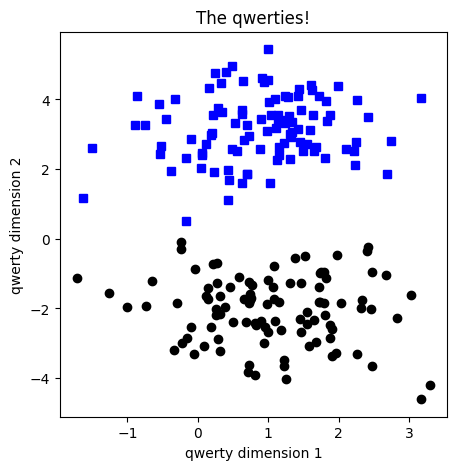

In [7]:


nPeroClust = 100

blur = 1

A = [1,3]
B = [1,-2]

a = [A[0] + np.random.randn(nPeroClust)*blur, A[1] + np.random.randn(nPeroClust)*blur]
b = [B[0] + np.random.randn(nPeroClust)*blur, B[1] + np.random.randn(nPeroClust)*blur]

labels_np = np.vstack((np.zeros((nPeroClust,1)),np.ones((nPeroClust,1))))

data_np = np.hstack((a,b)).T


data = torch.tensor(data_np).float()

labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))

plt.plot(data[np.where(labels == 0)[0],0],data[np.where(labels ==0)[0],1],'bs')
plt.plot(data[np.where(labels == 1)[0],0],data[np.where(labels ==1)[0],1],'ko')

plt.title('The qwerties!')

plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()


In [ ]:

def createANN(learningRate):

    class ANNiris(nn.Module):

        def __init__(self):
            super().__init__(self)
            self.input = nn.Linear(2,16)

        #向前传递
        def forward(self,x):

            # input layer
            x = self.input(x)
            x = F.relu(x)

            ##  简写成一行
            # x = F.relu(self.input(x))

            # hidden layer
            x = self.hidden(x)
            x = F.relu(x)

            # return output layer
            x = self.output(x)
            x = torch.sigmoid(x)

            return x


    ANN = ANNiris()

    lossfun = nn.BCELoss()
    
    optimizer = torch.optim.SGD(ANN.parameters(),lr =learningRate) 

    return ANN,lossfun,optimizer
    
        

In [ ]:


ANN ,lossfun ,optimizer = createANN(.01)

losses,predictions,totalacc = trainTheModel(ANN)
